# ML in Cybersecurity: Project I

## Team
  * **Team name**:  *Noobies*
  * **Members**:  *Mejbah Uddin Shameem (s8mesham@stud.uni-saarland.de), Norman Becker (nobe00001@stud.uni-saarland.de), Philipp Baus (s8phbaus@stud.uni-saarland.de)*

## Logistics
  * **Due date**: 29th November 2020, 23:59:59 (email the completed notebook to mlcysec_ws2021_staff@lists.cispa.saarland)
  * Complete this in **teams of 3**
  * Feel free to use the course [mailing list](https://lists.cispa.saarland/listinfo/mlcysec_ws2021_stud) to find group members.
  
## Timeline
  * 16-Nov-2020: Project 1 hand-out
  * **29-Nov-2020** (23:59:59): Email the completed notebook to mlcysec_ws2021_staff@lists.cispa.saarland
  * 30-Nov-2020: Project 1 discussion and summary
  
  
## About this Project
In this project, you'll implement a digit classifier, based on the popular [MNIST](http://yann.lecun.com/exdb/mnist/) dataset. The dataset is based on a seminal [paper](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf), which immensely popularized (convolutional) neural networks. This is a great starting point for ML research and this dataset/model has been a stepping stone numerous other tasks such as [GANs](https://papers.nips.cc/paper/5423-generative-adversarial-nets.pdf), [Adversarial Perturbations](https://arxiv.org/abs/1412.6572) and so many more!

This dataset consists of data $\mathcal{D} = \{x_i, y_i\}_{i=1}^N$, where $x_i$ is a 28x28 pixel grayscale image and $y_i$ is a scalar represeting digits between 0-9. The notebook will guide you to load this data, implement classifiers $\hat{y_i} = f_w(x_i)$  and analyze results. By doing so, you'll have a ML model that works on real data!

To put things into context, have a look at Slide 21 in the [second](https://cms.cispa.saarland/mlcysec19/dl/4/2019-10-24-ml.pdf) lecture. Within this framework, the following blocks of this project are fixed:
  * *Real-world problem*: Digit classification
  * *Performance metric*: Mean accuracy i.e., $ \frac{1}{N} \sum_{i=1}^N \mathbb{1}[\hat{y_i} = y_i]$, where $\mathbb{1}[\hat{y_i} = y_i]$ is 1 if your model predicted the right digit for the $i$-th digit and 0 otherwise.
  * *Data*: The MNIST dataset

You'll make the the following design-choices:
 * *Choice of Model*: A model family (Non-parametric methods, Linear classifiers, Neural Networks, etc.)
 * *ML Model*: Specific model (e.g., SVM with a polynomial kernel)
 * *Loss/Risk*
 * *Optimization*


## A Note on Grading
The grading for this project will depend on:
 1. Functional digit classifier
   * Following a well-defined ML pipeline
   * Developing 3 classification models (keep them diverse and ideally of increasing complexity)
   * Obtaining reasonable accuracies (>80%) on a held-out test set
 1. Analysis
   * Which methods work better than the rest and why?
   * Which hyper-parameters and design-choices were important in each of your methods?
   * Quantifying influence of these hyper-parameters on loss and/or validation accuracies
   * Trade-offs between methods, hyper-parameters, design-choices
    * Anything else you find interesting (this part is open-ended)
  
 A note on (1.): 
  * Choose your models that aids good insights. We require at least one non-Neural Network (e.g., SVM, KNN) and one Neural Network model (e.g., MLP, CNN).
  * We definitely don't expect all three models to achieve >99% test accuracies!

## Grading Details
 * 5 points for loading and visualization 
 * 25x3 points for models. Per model:
   * 4 points for written description 
   * 7 points for implementation
   * 7 points for evaluation
   * 7 points for summary
 * 15 points for final summary (Section 3)
 * 5 points for clean code
 
## Filling-in the Notebook
You'll be submitting this very notebook that is filled-in with your code and analysis. Make sure you submit one that has been previously executed in-order. (So that results/graphs are already visible upon opening it). 

The notebook you submit **should compile** (or should be self-contained and sufficiently commented). Check tutorial 1 on how to set up the Python3 environment.


**The notebook is your project report. So, to make the report readable, omit code for techniques/models/things that did not work. You can use final summary to provide report about these codes.**

It is extremely important that you **do not** re-order the existing sections. Apart from that, the code blocks that you need to fill-in are given by:
```
#
#
# ------- Your Code -------
#
#
```
Feel free to break this into multiple-cells. It's even better if you interleave explanations and code-blocks so that the entire notebook forms a readable "story".


## Code of Honor
We encourage discussing ideas and concepts with other students to help you learn and better understand the course content. However, the work you submit and present **must be original** and demonstrate your effort in solving the presented problems. **We will not tolerate** blatantly using existing solutions (such as from the internet), improper collaboration (e.g., sharing code or experimental data between groups) and plagiarism. If the honor code is not met, no points will be awarded.

 
 ## Versions
  * v2.0: Added pytorch
  * v1.1: Added Code of Honor
  * v1.0: Initial notebook
  
  ---

In [ ]:
import time 
 
import numpy as np 
import matplotlib.pyplot as plt 

import json 
import time 
import pickle 
import sys 
import csv 
import os 
import os.path as osp 
import shutil 

import pandas as pd

from IPython.display import display, HTML
 
%matplotlib inline 
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots 
plt.rcParams['image.interpolation'] = 'nearest' 
plt.rcParams['image.cmap'] = 'gray' 
 
# for auto-reloading external modules 
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython 
%load_ext autoreload
%autoreload 2

In [ ]:
# Load other libraries here.
# Keep it minimal! We should be easily able to reproduce your code.

# We only support sklearn and pytorch.

# Please set random seed to have reproduceable results, e.g. torch.manual_seed(123)
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pickle
import torchvision.transforms as transforms
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import time
from sklearn import svm, metrics
torch.manual_seed(123)

Helpers

In case you choose to have some methods you plan to reuse during the notebook, define them here. This will avoid clutter and keep rest of the notebook succinct.

In [ ]:
def identity_func(foo):
    return foo

# ------ Start Your Code ------

def show_wrong_numbers(y_eval,predictions):
  wrong_number = []
  # append wrong digit predictions to the array
  for counter_elem in range(0,len(predictions)):
          if y_eval[counter_elem] != predictions[counter_elem]:
              wrong_number.append(y_eval[counter_elem])
  fig, ax = plt.subplots()
  fig.suptitle("Distribution of the Wrong predicted numbers") # set the title of the figure
  count = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
  # count how often each digit got misspredicted (count how often they occur in the array)
  for label in wrong_number:
      count[label] += 1
  # plot the number of misspredictions per digit with a bar chart
  ax.bar(np.arange(10), count, align="center")
  ax.set_xlabel("Digit")
  ax.set_ylabel("Number of occurences ")
  ax.set_xticks(np.arange(10))
  plt.show()

# ------ END Your Code --------

# You can use this function to flatten 2D inputs
def flatten_input_pixels(x_input):
    result = []
    for i in range(len(x_input)):
        result.append(x_input[i].flatten())
    return np.array(result, np.uint8)  # [n_samples, n_features]


# You can use this function to plot the accuracy of the models with different parametes
def plot_scores(x, y, title = "Title", x_label = "X", y_label = "Y"):
    fig, ax = plt.subplots(nrows=1,ncols=1)

    ax.plot(x, y)
    ax.set_xticks(x)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_ylim(0.6, 1.0)

# You can use this function to visualize input images and the predictions of your models
# "y_pred" is output of your model 
# "n_val" is number of instances in test or validation sets
def vis_predictions(x_eval, y_pred, n_val):
    rows, cols = 4, 3

    fig,ax = plt.subplots(nrows = rows, ncols = cols)

    ids = np.random.randint(0,n_val,rows*cols)
    for i in range(cols):   
        for j in range(rows):
            ax[j][i].set_title('predicted label: {0}'. format(y_pred[ids[(i*rows)+j]]))
            two_d = (np.reshape(x_eval[ids[(i*rows)+j]], (28, 28))).astype(np.uint8)
            ax[j][i].imshow(two_d)
            ax[j][i].axes.get_xaxis().set_visible(False)
            ax[j][i].axes.get_yaxis().set_visible(False)


    plt.tight_layout()  

# 1. Loading and Visualizing data (5 points)

In this section, you'll need to prepare the MNIST data for the experiments you'll be conducting for the remainder of the notebook.

## 1.1. Load Data

Here you'll load the MNIST data into memory. The end-goal is to two have the following variables:
  * `x_trainval`, `x_test`: of shape $N \times d_1 \times d_2 \dots$ (e.g., $N \times 784$. 784 since you could flatten each 28x28 pixel image into a single vector)
  * `y_trainval`, `y_test`: of shape $N \times K$ (K = 1 or 10 depending on how you plan to represent the ground-truth digit annotation)

You can either do this by:
  1. Downloading the MNIST dataset, unpacking and preparing it yourself to have fine-grained control
  1. Using high-level existing functions, such as the one provided by  [`torchvision.datasets`](https://pytorch.org/docs/stable/torchvision/datasets.html#mnist).
  
  
  In either case, it is important that you have disjoint trainval and test splits!

In [ ]:
# ------ Start Your Code ------

# download the dataset with torchvision
data_trainval = torchvision.datasets.MNIST(root="./dataset", train=True, download=True, transform=None, 
                                      target_transform=None)
data_test = torchvision.datasets.MNIST("./dataset", train=False, download=True, transform=None, 
                                     target_transform=None)

#Inititialize Emtpy Data Sets
x_trainval = []
y_trainval = []
x_test = []
y_test = []

#Get the Data from data_training and move them to (y|x)_trivial
for elem in data_trainval:
    x_trainval.append(np.array(elem[0]).flatten()) #Flatten data from 2D to 1D and append to list
    y_trainval.append(elem[1])
#Formate data list to np.array
x_trainval = np.array(x_trainval)
y_trainval = np.array(y_trainval)

#Get the Data from data_training and move them to (y|x)_test
for elem in data_test:
    x_test.append(np.array(elem[0]).flatten()) #Flatten data from 2D to 1D and append to list
    y_test.append(elem[1])
#Formate data list to np.array
x_test = np.array(x_test)
y_test = np.array(y_test)

# ------ END Your Code --------
print('x_trainval.shape = {},  y_trainval.shape = {}'.format(x_trainval.shape, y_trainval.shape))
print('x_test.shape = {},  y_test.shape = {}'.format(x_test.shape, y_test.shape))

# Feel free to have multiple variables in case your models are designed for different formats
# For instance, in case your model requires Nx28x28 inputs, declare x_trainval_3d, etc.

# Tip: Set this to a tiny number (such 0.05) to aid debugging
# After all, you do not want to train/evaluate on the entire dataset to find bugs
DEBUG_FRAC = 1.0
x_trainval = x_trainval[:int(len(x_trainval)*DEBUG_FRAC)]
y_trainval = y_trainval[:int(len(y_trainval)*DEBUG_FRAC)]

Extracting ./dataset/MNIST/raw/train-images-idx3-ubyte.gz to ./dataset/MNIST/raw



Extracting ./dataset/MNIST/raw/train-labels-idx1-ubyte.gz to ./dataset/MNIST/raw


Extracting ./dataset/MNIST/raw/t10k-images-idx3-ubyte.gz to ./dataset/MNIST/raw


Extracting ./dataset/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./dataset/MNIST/raw
Processing...


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!
x_trainval.shape = (60000, 784),  y_trainval.shape = (60000,)
x_test.shape = (10000, 784),  y_test.shape = (10000,)


#### 1.2. Visualize Data

To get the hang of your data you'll be training a digit classifier on, visualize it.

Examples of ways to visualize it:
  * Given a digit, display few randomly sampled images for this digit (the bare minimum)
  * Visualize as a grid (e.g., Slide 4, [Lecture 2](https://cms.cispa.saarland/mlcysec19/dl/4/2019-10-24-ml.pdf)) using a combination of `plt.imshow` and `plt.subplots`
  
It's up to you to decide how you want to do this. The end-goal is for you to potentially give a trailer of the dataset to someone who hasn't seen it before.

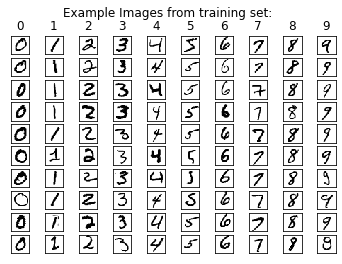

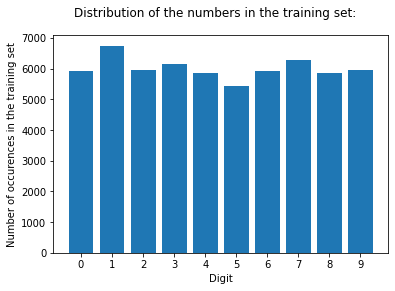

In [ ]:
# Visualize 10 examples of 10 classes. You can extend the following code:
rows, cols = 10, 10
fig, ax = plt.subplots(nrows = rows, ncols = cols)

# ------ Start Your Code ------
fig.suptitle("Example Images from training set:")
for i in range(0, 10):
    ax[0, i].set_title(str(i))  # set the digit number as the title of the column
    counter = 0
    found = 0
    # search for 10 examples of a specific digit and show the image at the corresponding position
    while found < 10:
        if y_trainval[counter] == i:
            ax[found ,i].get_xaxis().set_visible(False) # set the x axis inivisible, so that it looks nicer
            ax[found ,i].get_yaxis().set_visible(False) # set the y axis inivisible, so that it looks nicer
            ax[found, i].imshow(x_trainval[counter].reshape((28, 28)), cmap="gray_r") # draw the image
            found += 1
        counter += 1
# save the figure
plt.savefig('fig1.pdf') 


# plot how often each digit occurs in the dataset
fig, ax = plt.subplots()
fig.suptitle("Distribution of the numbers in the training set:")
count = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# count how often each digit occurs in the dataset
for label in y_trainval:
    count[label] += 1

# plot it with a bar chart
ax.bar(np.arange(10), count, align="center")
ax.set_xlabel("Digit")
ax.set_ylabel("Number of occurences in the training set")
ax.set_xticks(np.arange(10))

# ------ END Your Code --------

plt.savefig('fig2.pdf')   # Save the figures
plt.show()   # These should be some visualization of data at the end of this section

# You can see an output example in the follow:

# 2. Digit classifiers

In this section, you'll begin developing models to perform digit classification.

Each model needs to be structured like so:
  1. Give a brief reason which model you are going to train and why you choose it
  1. Define hyper-parameters for model and optimization procedure
  1. Define your model
  1. Define optimization method and fit model to data
  1. Summarize your findings







## 2.1: Model [M1]: K-Nearest-Neighbors (25 points)

**Short description**: *The K-Nearest Neighbor Classifier is a supervised learning Model, that tries to classify a data point by his k nearest neighbors. The label of a new data point is decided by the majority labels of the neighbors, a so-called majority vote.*

**Simple example**: *We want to split the numbers from 0 to 100 into 2 Groups(less equal 50 and bigger than 50) with the 1-N-N. We already trained the model with two data points:*
- *3  -> less equal 50*
- *52 -> bigger than 50*

*If we want to classify the number 10, then we would look at the nearest beighbor, which is 3. In reason of that 10 will be classified as less equal 50.*

**Why it should work well**: *The reason why we think a KNN model could perform quite well on this dataset is the following:
When we have pictures of two same digits, we can see that there are a lot of pixels that are the same in both pictures, so the data should lie closely together in a high dimensional space. So they will also have a small distance to each other what means that the KNN will probably recognize them as the same digit.*


### 2.1.1: Hyper-parameters

Define hyper-parameters for your model here

In [ ]:
# ------ Start Your Code ------

k_array = [1,2,3,4,7,9,13]
final_k = 1  # performed best on validation data

test_set = 'test'  #  or 'val'

# ------ END Your Code --------

# Decide all your hyperparameters based on validation performance
# Then, switch to 'test' for final evaluation
if test_set == 'val':
    x_train, x_eval, y_train, y_eval = train_test_split(x_trainval, y_trainval, test_size=0.3, random_state=4)
else:
    x_train, y_train = x_trainval, y_trainval
    x_eval, y_eval = x_test, y_test



### 2.1.2: Data Preprocessing


In [ ]:
# ------ Start Your Code ------
# We dont need Data Preprocessing in this Model, because we already did this in our data load section.
# ------ END Your Code --------
# e.g. normalize, flatten input data.

### 2.1.3: Model

Define your model here

In [ ]:
# ------ Start Your Code ------
# Model with best Score on Val data
final_knn = KNeighborsClassifier(n_neighbors=final_k)

# Init Models with different Hyper-parameters
if test_set == 'val':
    models = []
    for k in k_array:
        models.append(KNeighborsClassifier(n_neighbors=k))
# ------ END Your Code --------

### 2.1.4: Fit Model

Define optimization procedure and fit your model to the data

In [ ]:
# ------- Your Code -------

# Train best Model
start = time.time()
final_knn.fit(x_train, y_train)
end = time.time()
print("Time used to train KNN:", end-start)

# Train Models with different Hyper-parameters
if test_set == 'val':
    for model in models:
        model.fit(x_train, y_train)
# ------ END Your Code --------

#  Please save the trained model
pickle.dump(final_knn, open('KNN.model', 'wb'))

### 2.1.5: Evaluation

Evaluate your model.
  * Evaluate models with different parameters 
  * Plot the score (accuracy) for each model using "plot_scores" function
  * Report score for the best model
  * Use "vis_predictions" function to visualize few examples of test/validation set with the corresponding predictions


In [ ]:
# ------ Start Your Code ------
# Evaluate best Model on Test Data
start = time.time()
predictions = final_knn.predict(x_eval)
end = time.time()
print("Time used to predict data with KNN:", end-start)

# Evaluate Models with different Hyper-parameters on Val Data
if test_set == 'val':
    scores = []
    for model in models:
        scores.append(model.score(x_eval, y_eval))
    print(scores)
else:
    scores = [0.97275, 0.9670833333333333, 0.9715833333333334, 0.9696666666666667, 0.9699166666666666, 0.9676666666666667, 0.9666666666666667] # Scores with different Hyper-parameters on Val
    # print(scores)
#
# Example: y_pred = model.predict(x)
# ------ END Your Code --------

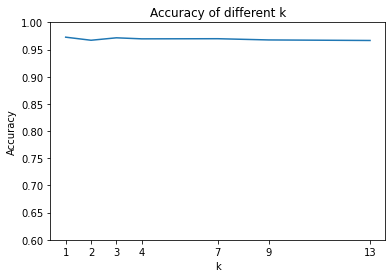

In [ ]:
# Here plot score (accuracy) for each model. You can use "plot_scores" function.

# Example: plot_scores(parameters, scores, "title", "x_label", "y_label"), 

# You can see an example in the follow.
# Note that the visualizations/plots provided are just simple examples/illustrations. 
# We encourage more informative and alternate methods to present results.
plot_scores(k_array, scores, title="Accuracy of different k", x_label="k", y_label="Accuracy")

In [ ]:
# Here report the score for the best model

# ------ Start Your Code ------
print("Score of the best model:", final_knn.score(x_eval, y_eval)) #0.9691
# ------ END Your Code --------

Score of the best model: 0.9691


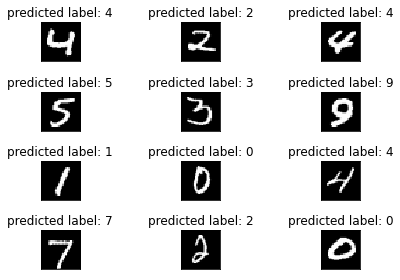

In [ ]:
# Visualize the predictions
# Example: vis_predictions(x_eval, y_pred, size_of_data)
#
#
# ------- Your Code -------
#
vis_predictions(x_eval, predictions, len(predictions))

In [ ]:
### Let's see wich ones are predicted wrong

In [ ]:

show_wrong_numbers(y_eval,predictions)

NameError: ignored

### 2.1.6: Summary

#### <u>General</u> 
*As we see with K-Nearest-Neighbors we have a score of 96%.*
 
#### <u>Which hyper-parameters were important and how did they influence your results?</u>
*In the KNN implemention from sklearn we have the following hyper-parameters:*
- *n_neighbors:int -> default=5*
- *weights:{‘uniform’, ‘distance’} -> default= 'uniform'*
- *algorithm:{‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’} -> default=’auto’*

...
and a few more. As you can see in the [User Guide](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).
 
Because we think in KNN the number of the nearest Neighbors is much more important than the others, we decided only to change the K parameter.

In our case test different k between 1 to 13. We found, that with higher k's we get worse prediction. We get the best score by just looking at one neighbor.

#### <u>What were other design choices you faced?</u>
Because KNN is a simpler Model, there are not other design choices for it.

#### <u>Any other interesting insights </u>
*We decide, that it could be interesting to look at wrong predicted numbers, so we wrote a simple function, which plot us the distribution of them.
The number 8 is mostly predicted wrong.
A possible reason for this is that every number is overlapping with 8. If you have the number 8 you can create every other number by removing parts of the 8. Example:*
- *8 -> 9 remove below-left.*

In reason of that 8 can look like other numbers, especially when it is written by human.

# 2.2: Model [M2]: *Support Vector Machine (SVM)* (25 points)

**Short description:** *Support Vector machines are a machine learning model, belonging to the group of supervised learning algorithms. To classify the data, the SVM creates a set of hyperplanes that splits the data (in a high dimensional space) by their labels. The predictions are then done by checking in which split of the space they are and then returning the label, that belongs to this split.*

**Why we choose this model:** *We choose this model for the same reason we also chose the knn. When we have two same digits, they have a lot of pixels in common, so when representing them in high dimensional space, they should lie close together and so the SVM model should perform very well on predicting the handwritten digits as it should be able to seperate them easily by a hyperplane then.*




### 2.2.1: Hyper-parameters

Define hyper-parameters for your method here

In [ ]:
# ------- Your Code -------
#Kernel Parameters
kernel_array = [['linear'],['poly',1],['poly',3],['poly',5],['rbf'],['sigmoid']] #possible kernel Parameters
final_kernel = 'rbf'  # performed best on validation data
kernel_array_print = ['linear','poly_1','poly_3','poly_5','rbf','sigmoid'] # like kernel_array just for printing

#rbf Parameters (C and Gamma)
C_array = [0.1,1,3.0,5.0,7.0] # possible C parameters
final_c = 3.0 #performed best on validation data

gamma_array = [['scale'],['auto']] # possible Gamma parameters  
final_gamma = 'scale' #performed best on validation data

c_gamma_array_print=['scale_0.1','scale_1','scale_3.0','scale_5.0','scale_7.0',
                   'auto_0.1','auto_1','auto_3.0','auto_5.0','auto_7.0'] # possible combination of Gamma and C just for printing 

test_set = 'test'  #  or 'val'

# ------ END Your Code --------

# Decide all your hyperparameters based on validation performance
# Then, switch to 'test' for final evaluation
if test_set == 'val':
    x_train, x_eval, y_train, y_eval = train_test_split(x_trainval, y_trainval, test_size=0.3, random_state=4)
else:
    x_train, y_train = x_trainval, y_trainval
    x_eval, y_eval = x_test, y_test


### 2.2.2: Data Preprocessing


In [ ]:
# ------ Start Your Code ------
# We dont need Data Preprocessing in this Model, because we already did this in our data load section.
# ------ END Your Code --------
# e.g. normalize, flatten input data.

### 2.2.3: Model

Define your model here (all hyper-parameters in 2.1.1)

In [ ]:
# ------ Start Your Code ------
#Best Parameters on Val
final_svm = svm.SVC(kernel='rbf',gamma=final_gamma,C=final_c)

In [ ]:
#find best kernel on Val Data
if test_set == 'val':
    models_kernel = []
    for elem in kernel_array:
        if len(elem) == 1:
            models_kernel.append(svm.SVC(kernel=elem[0]))
        else:
            models_kernel.append(svm.SVC(kernel=elem[0],degree=elem[1]))

In [ ]:
#find best C and Gammar on Val
if test_set == 'val':
    models_cgamma = []
    for Gamma in gamma_array:
        for c in C_array:
            models_cgamma.append(svm.SVC(kernel='rbf',gamma= Gamma[0],C=c))
# ------ END Your Code --------

### 2.2.4: Fit Model


In [ ]:
# ------ Start Your Code ------
#Train on best Parameters
start = time.time() 
final_svm.fit(x_train, y_train)
end = time.time()
print("Time used to train SVM:", end-start)

In [ ]:
#Train different Kernels
if test_set == 'val':
    for model in models_kernel:
        model.fit(x_train, y_train)

In [ ]:
#Train different  C and gamma Parameters
if test_set == 'val':
    for model in models_cgamma:
        model.fit(x_train, y_train)
# ------ END Your Code --------

In [ ]:
#  Please save the trained model
pickle.dump(final_svm, open('svm.model', 'wb'))

### 2.2.5: Evaluation

Evaluate your model.
  * Evaluate models with different parameters 
  * Plot score (accuracy) for each model using "plot_scores" function
  * Report the score for the best model
  * Use "vis_predictions" function to visualize few examples of test/validation set with the corresponding predictions


In [ ]:
# ------ Start Your Code ------
# Evaluate best Model on Test Data
start = time.time()
predictions = final_svm.predict(x_eval)
end = time.time()
print("Time used to predict data with SVM:", end-start)

[0.9158333333333334, 0.9275, 0.9366666666666666, 0.8620833333333333, 0.95625, 0.8641666666666666]


In [ ]:
# Evaluate Kernel Models on Val Data
if test_set == 'val':
    scores_kernel = []
    for model in models_kernel:
        scores_kernel.append(model.score(x_eval, y_eval))
    print(scores_kernel)
else:
    scores_kernel = [0.9138333333333334, 0.9325, 0.9624166666666667, 0.9216666666666666, 0.9700833333333333, 0.7945]
    print(scores_kernel)

# Example: y_pred = model.predict(x)

In [ ]:
# Evaluate C and Gamma Models on Val Data
if test_set == 'val':
    scores_cgamma = []
    for model in models_cgamma:
        scores_cgamma.append(model.score(x_eval, y_eval))
    print(scores_cgamma)
else:
    scores_cgamma = [0.93975, 0.9700833333333333, 0.9760833333333333, 0.9765, 0.9764166666666667, 0.11408333333333333, 0.11408333333333333, 0.11408333333333333, 0.11408333333333333, 0.11408333333333333]
    print(scores_cgamma)

# ------ END Your Code --------

[0.9158333333333334, 0.9275, 0.9366666666666666, 0.8620833333333333, 0.95625, 0.8641666666666666]


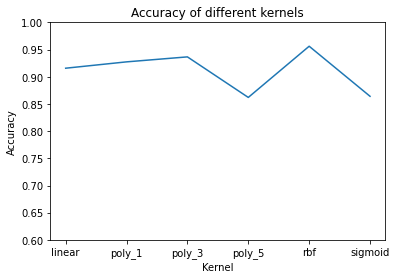

In [ ]:
# Here plot score (accuracy) for each model. You can use "plot_scores" function.

# Example: plot_scores(parameters, scores, "title", "x_label", "y_label"), 

# You can see an example in the follow.
# Note that the visualizations/plots provided are just simple examples/illustrations. 
# We encourage more informative and alternate methods to present results.
plot_scores(kernel_array_print, scores_kernel, title="Accuracy of different kernels", x_label="Kernel", y_label="Accuracy")

In [ ]:
plot_scores(c_gamma_array_print, scores_cgamma, title="Accuracy of different c and gamma values", x_label="Kernel", y_label="Accuracy")

NameError: ignored

In [ ]:
# Here report the score for the best model
# ------ Start Your Code ------
print("Score of the best model:", final_svm.score(x_eval, y_eval)) # 0.9834

Score of the best model: 0.9834


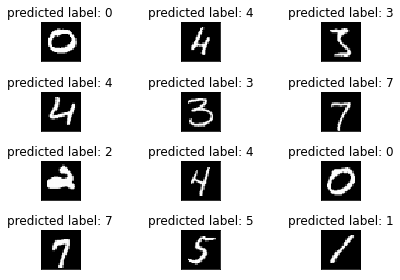

In [ ]:
# Visualize the predictions
# Example: vis_predictions(x_eval, y_pred, size_of_data)
# ------ Start Your Code ------
vis_predictions(x_eval, predictions, len(predictions))
# ------ END Your Code --------

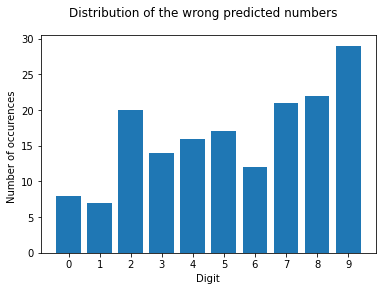

In [ ]:
# ------ Start Your Code ------
# Show destribution of wrong prediceted numbers
show_wrong_numbers(y_eval,predictions)
# ------ END Your Code --------

### 2.2.6: Summary

#### <u>General</u> 
As we see with SVM we have a score of 98%.

#### <u>Which hyper-parameters were important and how did they influence your results?</u>
*In the SVM implemention from sklearn we have the following hyper-parameters:*
- *C:float -> default=1.0*
- *kernel:{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} -> default=’rbf’*
- *gamma:{‘scale’, ‘auto’} or float ->default=’scale’*
- *degree:int -> default=3*
...
and a few more. As you can see in the [User Guide](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).

The most important choice to make for an SVM is the choice of the kernel.

#### Kernel
*Possible Funktions for Kernel are:*
- linear $<x,x'>$
- polynomial $(\gamma \langle x, x'\rangle + r)^d$ where $d$ is specified by parameter degree, by coef0.
- rbf $\exp(-\gamma \|x-x'\|^2)$ where is $\gamma$ specified by parameter gamma, must be greater than 0.
- sigomoid of $\tanh(\gamma \langle x,x'\rangle + r)$where $r$ is specified by coef0.

*After training our SVM with these kernels, we found out that the usage of the "rbf" kernel is the best for this classification task. It has the highest score (accuracy) on validation data. The "linear" kernel and "polynomial" kernel with degree 1 and 3 also performed pretty good, but couldn't reach the score of the "rbf" kernel. The "polynomial" kernel for degree 5 and the "sigmoid" kernel were by far the worst ones. The reason for this might be that the model overfits if they are used.*

#### C and Gamma
*When using the rbf kernel, C and Gamma get important. C influences the size of the margin. A higher C means that a smaller margin is accepted. In Our Case C=3 was performing best. Gamma regualrizes the influence of a single support vector and can be set to scale or auto. Auto was performing really bad and scale very good, so its easy to choose Auto for the parameter Gamma.*

#### <u>What were other design choices you faced?</u>
*SVM needs more time to compute than other classifiers. In reason of that we had to split the choice of the best model into different parts. First we evaluate the best Kernel and after this we evaluated the best parameters for this specific kernel function. It was not possible to try all permutations of all Parameters and kernel functions, because of the long computation time.*  

#### <u>Any other interesting insights </u>
*When we plotted how often each digit got mispredicted, we could also figure out that "8" and "9" were the digits that were mispredicted most often. The reason for that might be that these two digits look similar and so in handwriting it sometimes can be pretty difficult (also for a human being) to figure out which digit it is. So the SVM also might have problems to distinguish between these two digits.*

# 2.3: Model [M3] (Neural Networks): *CNN* (25 points)

**Short description**: *For classifying digits, as the third model we choose to use CNN as our preferred network. In the MNIST dataset each image is of size 28*28 while having grayscale value. Two 2D convolutional layers are used with rectified linear unit activation (ReLU) is used each time. Two 2d MaxPool layers with filter size (2x2) are used for choosing the best features. 2 fully connected (Linear) layers are used afterwards. As the loss criteria cross entropy loss is used with SGD being the optimizer*

**Why should it work well**: Convolution neural network is now widely used for image classfication tasks due to its usefulness. CNN is a good choice because it reduces the number of parameters without losing the quality of the model. Images have high dimensions so CNN based model is automatic a good choice for feature extraction as it will reduce the featues without losing important information through filtration and max pooling. The reduced featues/dimensions after convolution operation are then fit into fully connected layers to get the output



### 2.3.1: Hyper-parameters

Define hyper-parameters for your method here

In [ ]:
#
#
# ------- Your Code -------
#
#
batch_size_train = 64 # Fill in
batch_size_test = 64 # Fill in
n_epochs = 5 # Fill in
lr=0.01
momentum=0.9
PATH = './cnn_mnist.pth'
mode = 'debug' # set to 'eval' if you want to load the saved model after first run
# please keep the mode  'debug' to bypass any error while running the model for the first time

# other parameters ...


# You don't need the following code, if you can use data from 2.1.1.
# You can also use torch built-in functions (torch.utils.data)


# If GPU is available select GPU instead of CPU for doing tensor operations
device = 'cuda' if torch.cuda.is_available() else 'cpu'

### 2.3.2: Data Preprocessing


In [ ]:
#
#
# ------- Your Code -------
#
# e.g. normalize, flatten input data.
# Normalize MNIST and convert dataset to tensor
transform = transforms.Compose([transforms.ToTensor(),
                                torchvision.transforms.Normalize((0.1307,), (0.3081,))])

data_trainval.transform = transform
data_test.transform = transform

trainloader = torch.utils.data.DataLoader(data_trainval, batch_size_train,
                                              shuffle=True, num_workers=0)
testloader = torch.utils.data.DataLoader(data_test, batch_size_test,
                                              shuffle=True, num_workers=0)


### 2.3.3: Model

Define your model here

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16,5)
        self.fc1   = nn.Linear(256, 128)
        self.fc2   = nn.Linear(128, 10)
        

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x  

### 2.2.4: Fit Model


In [ ]:
#
#
# ------- Your Code -------
#
# Example: net = Net(), ....

net = Net()
net = net.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr, momentum)

In [ ]:
def test(net):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            #get the smaples from the test data
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            # get the prediction in outputs
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            # measure of correct predictions
            correct += (predicted == labels).sum().item()
        accuracy = 100 * correct / total 
    return accuracy

In [ ]:
# recording values in list for plotting
list_loss = [] 
iteration = [] 
accuracy = []
def train():
    print('Training MNIST...')
    count = 0
    for epoch in range(n_epochs):  # loop over the dataset multiple times
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            # zero the parameter gradients
            optimizer.zero_grad()
    
            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            count += 1 
            # print statistics
            running_loss += loss.item()
            if i % 300 == 299:    # print every 2000 mini-batches
                print('[Epoch %d, Batch %3d] Running loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 300))
                list_loss.append(running_loss / 300) #loss data
                iteration.append(count)
                running_loss = 0.0
                accuracy.append(test(net))
        # run test after each epoch
        print('Accuracy of the test set after %d epoch: %d %%' % (epoch+1,test(net))) 
    # Save the trained model
    torch.save(net.state_dict(), PATH)
    print('Finished Training the Model')

                
torch.save(net.state_dict(), PATH)

In [ ]:
#
#
# ------- Your Code -------
# Example:
# net = Net()
# net.load_state_dict(torch.load("PATH"))
# Load the saved model to skip training the already trained model

if mode == 'debug':
    start = time.time()
    train()
    end = time.time()
    print("Time used to train CNN:", end-start)
else:
    net.load_state_dict(torch.load(PATH))
    net.eval()

Training MNIST...
[Epoch 1, Batch 300] Running loss: 0.569
[Epoch 1, Batch 600] Running loss: 0.122
[Epoch 1, Batch 900] Running loss: 0.087
Accuracy of the test set after 1 epoch: 98 %
[Epoch 2, Batch 300] Running loss: 0.065
[Epoch 2, Batch 600] Running loss: 0.054
[Epoch 2, Batch 900] Running loss: 0.060
Accuracy of the test set after 2 epoch: 98 %
[Epoch 3, Batch 300] Running loss: 0.045
[Epoch 3, Batch 600] Running loss: 0.043
[Epoch 3, Batch 900] Running loss: 0.042
Accuracy of the test set after 3 epoch: 98 %
[Epoch 4, Batch 300] Running loss: 0.034
[Epoch 4, Batch 600] Running loss: 0.033
[Epoch 4, Batch 900] Running loss: 0.032
Accuracy of the test set after 4 epoch: 98 %
[Epoch 5, Batch 300] Running loss: 0.025
[Epoch 5, Batch 600] Running loss: 0.027
[Epoch 5, Batch 900] Running loss: 0.029
Accuracy of the test set after 5 epoch: 98 %
Finished Training the Model


### 2.2.5: Evaluation

Evaluate your model.

  * Loss curves: Plot epoch (# passes over training data) and loss
  * Accuracy curves: Plot epoch and accuracy over val/test set
  * Final numbers: Report final accuracy numbers for your model

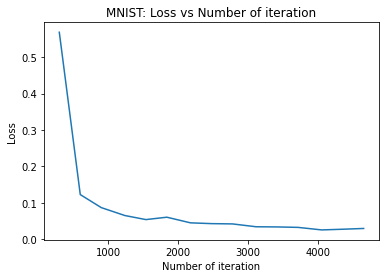

In [ ]:
# Here plot epoch (# passes over training data) and loss
#
# ------- Your Code -------
#
# This graph will be generated in debug mode only
if mode == 'debug':
    plt.plot(iteration,list_loss)
    plt.xlabel("Number of iteration")
    plt.ylabel("Loss")
    plt.title("MNIST: Loss vs Number of iteration")
    plt.show()

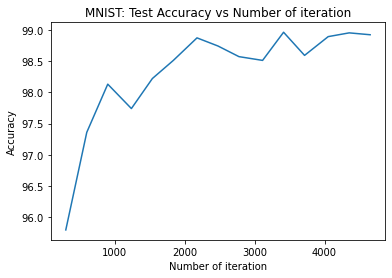

In [ ]:
# Here plot epoch and accuracy over val/test set
#
# ------- Your Code -------
#
# This graph will be generated in debug mode only. As by only loading the model previous list of losses and iterations list 
# is not getable.

if mode == 'debug':
    plt.plot(iteration, accuracy)
    plt.xlabel("Number of iteration")
    plt.ylabel("Accuracy")
    plt.title("MNIST: Test Accuracy vs Number of iteration")
    plt.show()

In [ ]:
# Here report the score for the best model
#
# ------- Your Code -------
#
if mode == 'debug': 
    print('Accuracy of the prediction of image classification in test data : %d %%' % (accuracy[-1]))
else: 
    start = time.time()
    print('Accuracy of the prediction of image classification in test data : %d %%' % (test(net)))
    end = time.time()
    print("Time used to predict data with CNN:", end-start)

Accuracy of the prediction of image classification in test data : 98 %


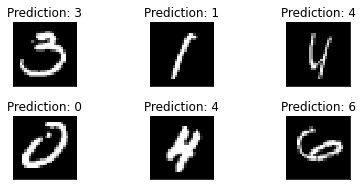

In [ ]:
# Visualize the predictions
# Example: vis_predictions(x_eval, y_pred, size_of_data)
#
#
# ------- Your Code -------
#
# Visualize some of the samples from the test data and compare the data with the model's prediction

samples = enumerate(testloader)
idx, (sample_data, sample_targets) = next(samples)

with torch.no_grad():
    sample_data = sample_data.to(device)
    sample_targets = sample_targets.to(device)
    output = net(sample_data)

fig = plt.figure()
for i in range(6):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    sample_data = sample_data.cpu()
    plt.imshow(sample_data[i][0], cmap='gray', interpolation='none')
    plt.title("Prediction: {}".format(
    output.data.max(1, keepdim=True)[1][i].item()))
    plt.xticks([])
    plt.yticks([])

In [ ]:
# ------ Start Your Code ------
# Show destribution of wrong prediceted numbers
show_wrong_numbers(y_eval,predictions)
# ------ END Your Code --------

### 2.3.6: Summary


The accuracy achieved in the test set after 5 epochs using the CNN model is typically >= 98%. Sometimes it's even 99%! The interesting fact is typically dataset normalization helps to make CNN perform better. However, in the case of MNIST dataset normalization does not have that much influence as with/without normalization around 97% test accuracy is achieved. In addition, batch size has a crucial impact in the training process of MNIST using CNN. Initailly(by a mistake), we used batch size of 4 and got very slow training process with around 80% test accuracy which is less compared to the accuracy of around 97% after 1 epoch of our final batch size of 64. With batch size 4, the model behaved very uncertainly while dropping the accuracy less than 10% and the loss increases dramatically after 3 epochs and after debugging, we changed the batch size 4 to a very promising and reasonable one to 64. Learning rate of .01 and .001 were tried and from the past experience and observing model behavoir, the learning rate of .01 was chosen finally. 

# 3. Summary (20 points)
Now after we finished all three Models KNN (M1), SVM (M2) and the Neural Network (M3) we can compare them to each other by looking at accuracy, speed and complexity. Furthermore we will also have a look

### Type of Learning
First when starting a new Machine Learn Projekt we have to think about, which Learning Type we use. There is supervised learning, semi-supervised learning and unsupervised learning. In our case we got labeled data. Because of that we choose to use supervised learning models. In general they should perform better then semi-/un- supervised Learning in this particular scenario.

### Test Set Accuracy
All three models performed very well. But still we can make a ranking out of it,based on the performance on the test data:

| Rank | Model | Test Accuracy |
|------|-------|---------------| 
|   1  |  SVM  |     98.34%    |  
|   2  |  CNN  |     98%       |  
|   3  |  KNN  |     96.91%    |  


Just by performance the winner would be the SVM, although the CNN is not far behind. The KNN is 2% behind the other models, but with an accuracy of 96.91% it performs pretty well too despite it is the worst of the three when looking at the models score on test data.

### Speed
Speed is also an import aspect. The best model is usless if it needs to long long to compute. When we measured the speed of the models on our system we got the following results:

| Rank | Model | Traing time | Prediction time |  Total Time  |
|------|-------|-------------|-----------------|--------------|
|   1  |  CNN  |  108.97 s   |       1.62 s    |   110,59 s   |
|   2  |  SVM  |  415.81 s   |     128.78 s    |   544,59 s   |
|   3  |  KNN  |   18.85 s   |     817.61 s    |   836,46 s   |

So as you can see the CNN is by far the fastest of our three models. The KNN and SVM are both pretty slow although the SVM is still much faster than the KNN. The KNN needs for predicting more time than any of our other models for both, training and predicting. We can also see that training is slower than predicting data for the SVM and the CNN, while for the KNN it is different. The KNN needs much more time to predict data than to train the model. 

### Implementation effort
The Implementation effort for KNN and SVM is with sklearn very easy. We need the 3 core functions init, fit ,predict and most of our work is done. Now we just neet to execute this functions with different parameter. In addition, it did not take much time to implement CNN based model for classifying MNIST. However, it took some time to figure out the reason when model performance was decreasing due to a poor choice of the batch size(4). The task was pretty straightforward using pytorch. We configured the appropiate network & layers with CNN, chose the loss criteria and selected an appropiate optimizer. From the past experience of the domain we could easily choose the other hyperparameters e.g. learning rate, momentum. The model converages right from the beginning with a very decent rate, so 5 epochs were enough to get >= 98% test accuracy and that too within 2-3 minutes. Indeed, it was a good choice to select CNN for digit classification task for the dataset like MNIST.   

### Model Complexity
We can divide our models in easy and complex models. KNN and SVM belong to the easy models, they use a simple concept to train data and then furthermore to predict other data. Our CNN instead is a deep learning model and so pretty complex. It chains a lot of easy computations to build a quite complex model.

But when we were looking at the computation times we encountered that the CNN needed the least time of all models by far when debug_frac was set to 1 although it is the most complex model. The othertwo easy models (KNN and SVM) were pretty slow and used a lot of computation time.

### Get even better
We have choosen this 3 models because we think they will work the best on this Task. To get even greater results we could try to get more data for training. We simply can shift ever picture one Pixel to the right, left, top or bottom. With this Method we can simply get a 4x bigger Data set. But also would it be possible to rotate the pictures to get more data to train on. These steps could help us to achieve a better Performance.

### And the Winner is ...
In conclusion we dont have one Winner, we have two: SVM (best accuracy) and NN (fastest but still pretty good accuracy). The KNN is the worst of our models as it takes the most time and also has the worst accuracy.